**Implement K-Means clustering/ hierarchical clustering on sales_data_sample.csv dataset. Determine the number of clusters using the elbow method.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read the dataset
dataset = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')

In [3]:
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# drop unwanted  features
sales = dataset.drop(columns=["ORDERDATE","CITY","STATUS","POSTALCODE","STATE", "TERRITORY", "CONTACTLASTNAME", "CONTACTFIRSTNAME","CUSTOMERNAME", "PHONE", "ORDERNUMBER", "ADDRESSLINE1", "ADDRESSLINE2"])

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
sales['PRODUCTLINE'] = labelencoder.fit_transform(sales['PRODUCTLINE'])
sales['COUNTRY'] = labelencoder.fit_transform(sales['COUNTRY'])
sales['DEALSIZE'] = labelencoder.fit_transform(sales['DEALSIZE'])
sales['PRODUCTCODE'] = labelencoder.fit_transform(sales['PRODUCTCODE'])

sales.head(4)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,2,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,3,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,3,8,2003,1,95,0,18,1


C:\Users\ASHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

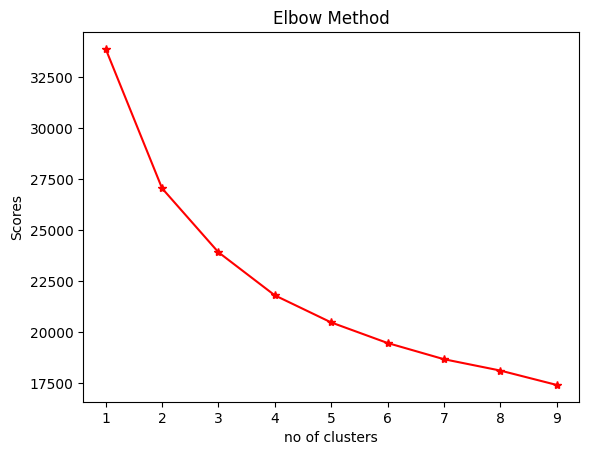

In [5]:
#Finding optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(sales)

scores_1 = []

range_of_cluster = range(1,10)

for i in range_of_cluster:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'r*-')
plt.xticks(np.arange(len(scores_1)), np.arange(1, len(scores_1) +1) )
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Scores')
plt.show()

In [7]:
# selected number of clusters as 5. (n = 5) based on the above graph

kmeans = KMeans(n_clusters=5,random_state=0)
kmeans.fit(scaled_data)

clusters_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales.columns])
y_kmeans = kmeans.predict(scaled_data)

data_with_cluster = pd.concat([sales, pd.DataFrame({'CLUSTER': kmeans.labels_})], axis=1)
data_with_cluster.head(10)
print(clusters_centers)

C:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


  QUANTITYORDERED PRICEEACH ORDERLINENUMBER     SALES    QTR_ID  MONTH_ID  \
0       -0.045128  0.760564        0.029773  0.892453  0.605162  0.593466   
1       -0.391395 -0.753072        0.031675 -0.798215 -1.061183 -1.061167   
2        0.510427  0.625638       -0.183727  0.728114 -1.135879 -1.129422   
3       -0.461002 -0.759795        0.062904 -0.818874  0.765340  0.766032   
4        0.534064  0.475476        0.043509  0.380858  0.666875  0.669665   

    YEAR_ID PRODUCTLINE      MSRP PRODUCTCODE   COUNTRY  DEALSIZE  
0 -0.457977   -0.746698  1.336272   -1.051989 -0.005109 -0.865434  
1  0.479408    0.163071 -0.627027    0.356201 -0.154680  0.937918  
2  0.783669   -0.091091  0.447794   -0.264567 -0.011013 -0.833779  
3 -0.376961    0.157342 -0.668098    0.351370  0.039138  1.015353  
4 -0.371004    0.371617 -0.098785    0.360488  0.119517 -0.700850  


In [6]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)

ModuleNotFoundError: No module named 'plotly'

In [7]:
#Dimension Reduce
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principal_comp = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_comp, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

#Showing
import plotly
import plotly.express as px
fig = px.scatter_3d(pca_df, x='pca_1', y='pca_2', z= 'pca_3',color='cluster', symbol='cluster', size_max=20, opacity=0.6)
fig.show()

# fig = px.scatter(pca_df, x='pca_1', y='pca_2',color ='cluster',symbol='cluster')
# fig.show()

ModuleNotFoundError: No module named 'plotly'